In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
dataset = pd.read_csv("Final.csv")
dataset.head(10)

,Patient_ID,PerformedDate,Name_calc,Albumin/Creatinine_Res,Lipids_Res,a1c_Res,BP_res,A1C_RF,BP_RF,Lip_RF,Alb_RF,Total_RF
0,1.000100e+12,2017-11-02,Urine Albumin/Creatinine Ratio (ACR),392.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
1,1.000100e+12,2017-10-16,Urine Albumin/Creatinine Ratio (ACR),221.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
2,1.000100e+12,2014-04-07,Urine Albumin/Creatinine Ratio (ACR),9.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
3,1.000100e+12,2014-03-07,Urine Albumin/Creatinine Ratio (ACR),8.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
4,1.000100e+12,2014-02-05,Urine Albumin/Creatinine Ratio (ACR),9.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
5,1.000100e+12,2014-01-17,Urine Albumin/Creatinine Ratio (ACR),61.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
6,1.000100e+12,2019-04-07,Urine Albumin/Creatinine Ratio (ACR),197.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
7,1.000100e+12,2019-03-13,Urine Albumin/Creatinine Ratio (ACR),163.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
8,1.000100e+12,2015-09-01,Urine Albumin/Creatinine Ratio (ACR),7.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
9,1.000100e+12,2015-07-13,Urine Albumin/Creatinine Ratio (ACR),3.0,NaN,NaN,NaN,0,0.0,0.0,1,1.0


In [3]:
datasetNew = dataset.drop(['Patient_ID', 'Name_calc', 'Albumin/Creatinine_Res', 'Lipids_Res','Total_RF', 'BP_res'], axis=1)
datasetNew = datasetNew.drop(['A1C_RF', 'BP_RF', 'Lip_RF', 'Alb_RF'], axis=1)
datasetNew['PerformedDate'] = pd.to_datetime(datasetNew['PerformedDate'], infer_datetime_format=True)
indexedDataset = datasetNew.set_index(['PerformedDate'])
print(indexedDataset)

               a1c_Res
PerformedDate         
2017-11-02         NaN
2017-10-16         NaN
2014-04-07         NaN
2014-03-07         NaN
2014-02-05         NaN
...                ...
2015-08-17         NaN
2016-09-21         NaN
2015-07-17         NaN
2018-01-22         NaN
2017-08-30         NaN

[5780611 rows x 1 columns]


In [4]:
from datetime import datetime

In [6]:
indexedDataset = indexedDataset.dropna()
print(indexedDataset)

               a1c_Res
PerformedDate         
2016-10-28        78.0
2016-10-14        68.0
2016-09-12        71.0
2016-07-15        72.0
2014-06-26       128.0
...                ...
2017-10-18        71.0
2018-03-22        78.0
2019-04-24        74.0
NaT               75.0
2018-06-15        55.0

[1452669 rows x 1 columns]


In [7]:
indexedDataset.index = pd.to_datetime(indexedDataset.index)
indexedDataset = indexedDataset.sort_index()
print(indexedDataset)

               a1c_Res
PerformedDate         
1995-09-05     96999.0
1995-09-14       105.0
1995-09-16     67999.0
1995-09-24     60999.0
1995-09-26        62.0
...                ...
NaT               62.0
NaT               56.0
NaT               74.0
NaT               84.0
NaT               75.0

[1452669 rows x 1 columns]


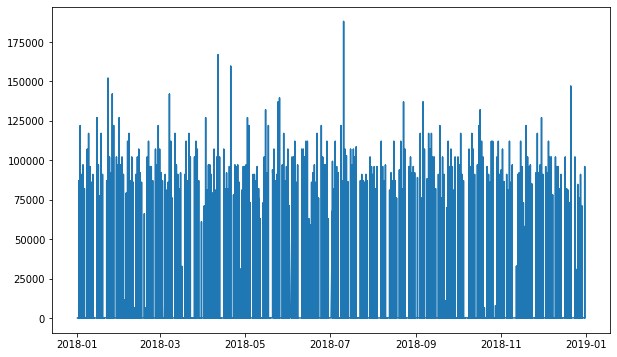

In [8]:
sub = indexedDataset['2018']
plt.plot(sub)

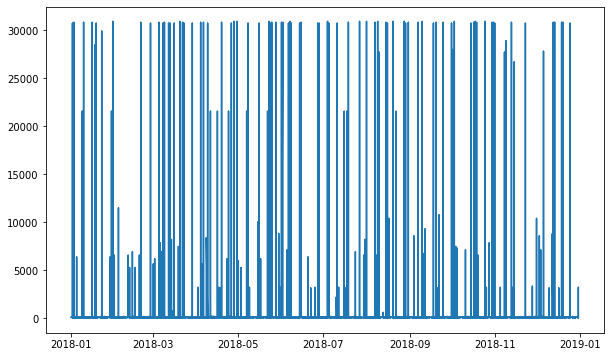

In [10]:
from scipy import stats
new = sub[(np.abs(stats.zscore(sub['a1c_Res'])) < 3)]
new2 = new.loc[(new!=0).any(axis=1)]
plt.plot(new2)

In [11]:
new2.head(30)

,a1c_Res
PerformedDate,
2018-01-01,55.0
2018-01-01,129.0
2018-01-02,64.0
2018-01-02,65.0
2018-01-02,93.0
2018-01-02,76.0
2018-01-02,62.0
2018-01-02,64.0
2018-01-02,78.0


In [12]:
#Determing rolling statistics
rolmean = new2.rolling(window=12).mean()
rolstd = new2.rolling(window=12).std()
print(rolmean, rolstd)

                 a1c_Res
PerformedDate           
2018-01-01           NaN
2018-01-01           NaN
2018-01-02           NaN
2018-01-02           NaN
2018-01-02           NaN
...                  ...
2018-12-31     71.333333
2018-12-31     71.000000
2018-12-31     71.166667
2018-12-31     70.916667
2018-12-31     65.833333

[159851 rows x 1 columns]                  a1c_Res
PerformedDate           
2018-01-01           NaN
2018-01-01           NaN
2018-01-02           NaN
2018-01-02           NaN
2018-01-02           NaN
...                  ...
2018-12-31      8.402741
2018-12-31      8.409951
2018-12-31      8.451286
2018-12-31      8.404094
2018-12-31     20.323892

[159851 rows x 1 columns]


In [13]:
indexedDataset_logScale = np.log(new2)
print(indexedDataset_logScale)

                a1c_Res
PerformedDate          
2018-01-01     4.007333
2018-01-01     4.859812
2018-01-02     4.158883
2018-01-02     4.174387
2018-01-02     4.532599
...                 ...
2018-12-31     4.262680
2018-12-31     4.234107
2018-12-31     4.304065
2018-12-31     4.262680
2018-12-31     1.945910

[159851 rows x 1 columns]


In [14]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
print(movingAverage, movingSTD)

                a1c_Res
PerformedDate          
2018-01-01          NaN
2018-01-01          NaN
2018-01-02          NaN
2018-01-02          NaN
2018-01-02          NaN
...                 ...
2018-12-31     4.260906
2018-12-31     4.256210
2018-12-31     4.258493
2018-12-31     4.255044
2018-12-31     4.065578

[159851 rows x 1 columns]                 a1c_Res
PerformedDate          
2018-01-01          NaN
2018-01-01          NaN
2018-01-02          NaN
2018-01-02          NaN
2018-01-02          NaN
...                 ...
2018-12-31     0.119319
2018-12-31     0.119159
2018-12-31     0.119848
2018-12-31     0.119009
2018-12-31     0.677956

[159851 rows x 1 columns]


In [15]:
# Get the difference between the moving average and the actual number of passengers
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,a1c_Res
PerformedDate,
2018-01-02,-0.097121
2018-01-02,-0.139691
2018-01-02,0.226384
2018-01-02,-0.121172
2018-01-02,-1.789738
2018-01-02,0.192850
2018-01-02,0.117586
2018-01-02,0.024869
2018-01-02,0.120427


In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['a1c_Res'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

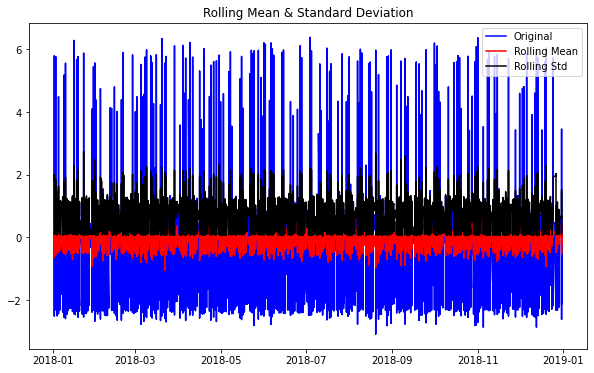

Results of Dickey-Fuller Test:
Test Statistic                    -75.705627
p-value                             0.000000
#Lags Used                         76.000000
Number of Observations Used    159763.000000
Critical Value (1%)                -3.430391
Critical Value (5%)                -2.861558
Critical Value (10%)               -2.566780
dtype: float64


In [20]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000000000
test_stationarity(datasetLogScaleMinusMovingAverage)

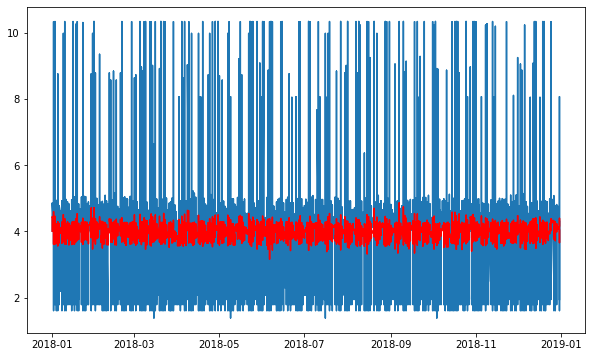

In [21]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

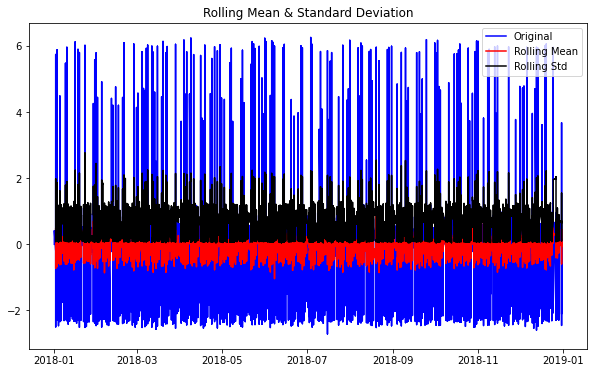

Results of Dickey-Fuller Test:
Test Statistic                    -66.472259
p-value                             0.000000
#Lags Used                         76.000000
Number of Observations Used    159774.000000
Critical Value (1%)                -3.430391
Critical Value (5%)                -2.861558
Critical Value (10%)               -2.566780
dtype: float64


In [22]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

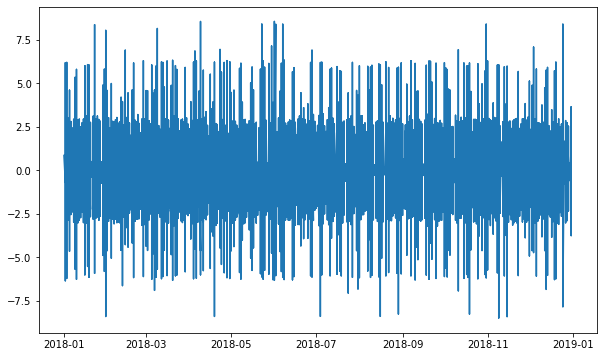

In [23]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

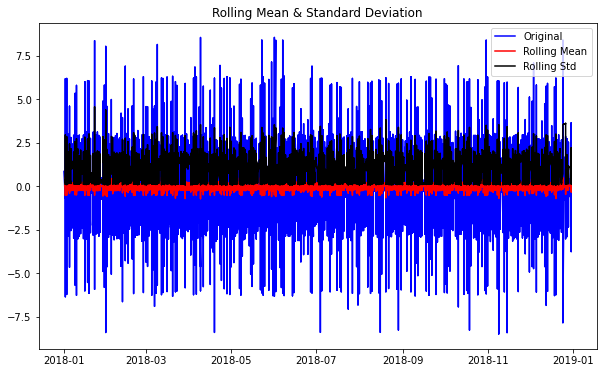

Results of Dickey-Fuller Test:
Test Statistic                    -79.185357
p-value                             0.000000
#Lags Used                         76.000000
Number of Observations Used    159773.000000
Critical Value (1%)                -3.430391
Critical Value (5%)                -2.861558
Critical Value (10%)               -2.566780
dtype: float64


In [24]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [25]:
indexedDataset_logScale.index = pd.to_datetime(indexedDataset_logScale.index)

In [ ]:
#import statsmodels as sm
#from statsmodels.tsa.seasonal import seasonal_decompose
#import statsmodels.api as sm
#indexedDataset_logScale.reset_index(inplace=True)
#indexedDataset_logScale['PerformedDate'] = pd.to_datetime(indexedDataset_logScale['PerformedDate'])
#df = indexedDataset_logScale.set_index('PerformedDate')

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


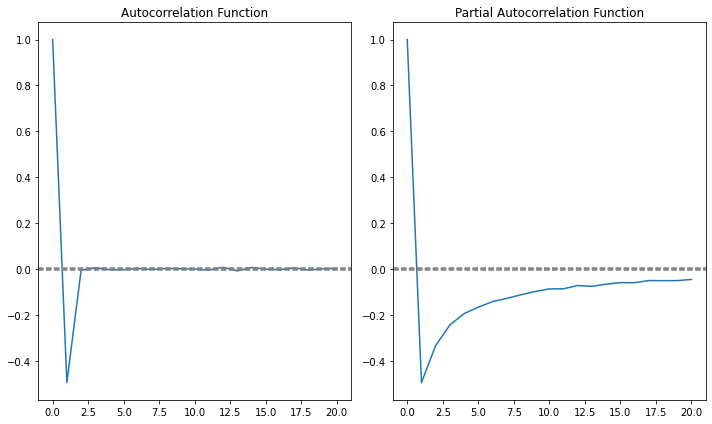

In [27]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Plotting AR model


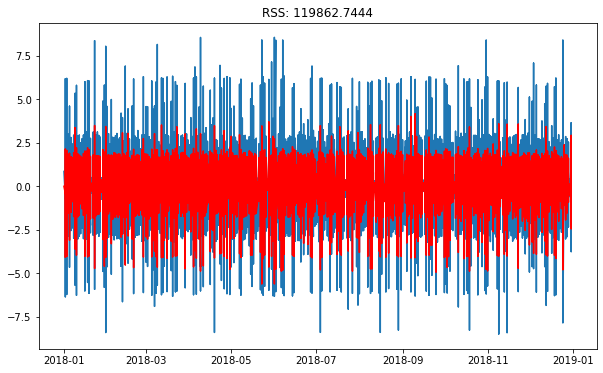

In [29]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['a1c_Res'])**2))
print('Plotting AR model')

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Plotting AR model


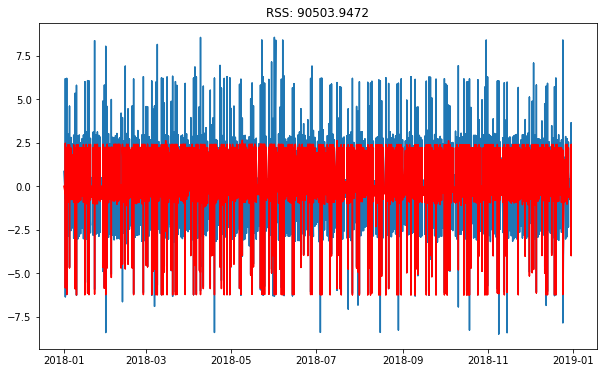

In [30]:
#MA MODEL
model = ARIMA(indexedDataset_logScale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['a1c_Res'])**2))
print('Plotting AR model')

In [31]:
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Albumin/Creatinine_Res'])**2))

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


MemoryError: Unable to allocate 190. GiB for an array with shape (159774, 159774) and data type float64

In [32]:
predictions_ARIMA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

PerformedDate
2018-01-01    1.440413e-09
2018-01-02   -4.209210e-01
2018-01-02    1.786535e-01
2018-01-02    1.229080e-01
2018-01-02   -1.840597e-01
dtype: float64


In [33]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

PerformedDate
2018-01-01    1.440413e-09
2018-01-02   -4.209210e-01
2018-01-02   -2.422674e-01
2018-01-02   -1.193594e-01
2018-01-02   -3.034191e-01
dtype: float64


In [34]:
#predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
#predictions_ARIMA_log.head()

predictions_ARIMA_log = pd.Series(indexedDataset_logScale.iloc[0,0],index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

PerformedDate
2018-01-01    4.007333
2018-01-01    4.007333
2018-01-02    3.586412
2018-01-02    3.765066
2018-01-02    3.887974
dtype: float64

MemoryError: Unable to allocate 442. GiB for an array with shape (59276774291,) and data type int64

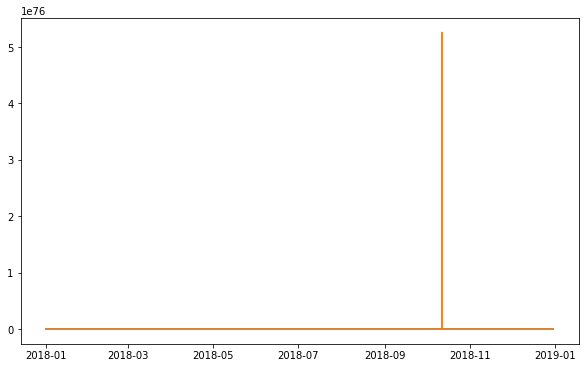

In [36]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(new2)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-indexedDataset['a1c_Res'])**2)/len(indexedDataset['a1c_Res'])))